# Xác thực độ chính xác

Trong sổ tay này, mục tiêu chính là xác thực độ chính xác của các mô hình bằng cách sử dụng phương pháp cross-validation 5 lần gập. Bước này nhằm chứng minh liệu mô hình có độ chính xác cao trên tập huấn luyện hay không. Bên cạnh đó, cross-validation cũng giúp kiểm tra xem các mô hình có bị overfit trên tập huấn luyện hay không.

In [6]:
# nhập tất cả các gói sẽ được sử dụng

# các gói cơ bản để xử lý dữ liệu
import pandas as pd
import numpy as np

# các gói cho học máy
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# các gói để diễn giải kết quả huấn luyện
import matplotlib.pyplot as plt
%matplotlib inline

# làm yên lặng cảnh báo từ gói sklearn
import warnings
warnings.filterwarnings('ignore')

# thiết lập hạt giống ngẫu nhiên để đảm bảo kết quả có thể tái tạo
import random
random.seed(10)
np.random.seed(10)

In [8]:
features = pd.read_csv('Dataset/features_selected/CIC-IDS2017_RandomForestClassifier_20.csv').squeeze()
features = features[:11]

## Tải dữ liệu

Trong sổ tay này, chỉ sử dụng tập huấn luyện.

In [12]:
columns = features.tolist() +  ['Label']

ids2017 = pd.read_csv('Dataset/dataset_cleaned/CIC-IDS2017.csv', usecols=columns)
ids2017.shape

(649762, 12)

## Xử lý bổ sung

In [15]:
ids2017 = ids2017.sample(frac=0.3).reset_index(drop=True)

### Chia tách các tính năng và nhãn.

In [18]:
ids2017_X = ids2017.drop('Label', axis=1).copy()
ids2017_y = ids2017['Label'].copy()

### Chuẩn hóa dữ liệu

In [21]:
scalar = StandardScaler()
# Chỉ huấn luyện trên dữ liệu huấn luyện
ids2017_X_scaled = scalar.fit_transform(ids2017_X)

## Xây dựng các mô hình tối ưu

In [24]:
models = {
    'Decision Tree': tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=1.4401469385343852e-05),
    'Random Forest': RandomForestClassifier(max_depth=20, min_samples_leaf=0.00001, min_samples_split=0.00001, n_estimators=350, n_jobs=-1,criterion='gini'),
    'Support Vector Machine': SVC(C=100, gamma=1, kernel='rbf'),
    'Naive Bayes': GaussianNB(var_smoothing=1.0),
    'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', alpha=0.0001, solver='adam', max_iter=1000),
    'Deep Neural Network': MLPClassifier(hidden_layer_sizes=(15, 15, 15), activation='tanh', alpha=1e-05, solver='adam', max_iter=1000)
}

In [26]:
accuracy_scores = {}
accuracy_scores_mean = {}
accuracy_scores_std = {}

cv = StratifiedKFold(n_splits=5, shuffle=True)

for model in models:
    clf = models[model]

    accuracy_scores[model] = cross_val_score(clf, 
                                            ids2017_X_scaled, 
                                            ids2017_y, 
                                            cv=cv, 
                                            scoring='accuracy',
                                            n_jobs=-1)
    accuracy_scores_mean[model] = np.mean(accuracy_scores[model])
    accuracy_scores_std[model] = np.std(accuracy_scores[model])

    print(f"{'-'*25} {model} {'-'*25}")
    print(f"Accuracy: {accuracy_scores[model]}")
    print(f"mean: {accuracy_scores_mean[model]:.4f}\t\tstd: {accuracy_scores_std[model]:.4f}")

------------------------- Decision Tree -------------------------
Accuracy: [0.99728108 0.99671677 0.99710152 0.99702457 0.99694754]
mean: 0.9970		std: 0.0002
------------------------- Random Forest -------------------------
Accuracy: [0.99679372 0.99784538 0.99738368 0.99679372 0.99699885]
mean: 0.9972		std: 0.0004
------------------------- Support Vector Machine -------------------------
Accuracy: [0.96542349 0.96406402 0.96603909 0.96411532 0.96549955]
mean: 0.9650		std: 0.0008
------------------------- Naive Bayes -------------------------
Accuracy: [0.7312625  0.73123685 0.73067255 0.7311086  0.73125561]
mean: 0.7311		std: 0.0002
------------------------- Artificial Neural Network -------------------------
Accuracy: [0.96403837 0.9673216  0.96460268 0.96963012 0.96806464]
mean: 0.9667		std: 0.0021
------------------------- Deep Neural Network -------------------------
Accuracy: [0.97801775 0.97417021 0.97750475 0.9778382  0.9756573 ]
mean: 0.9766		std: 0.0015


## Điểm độ chính xác của mỗi mô hình

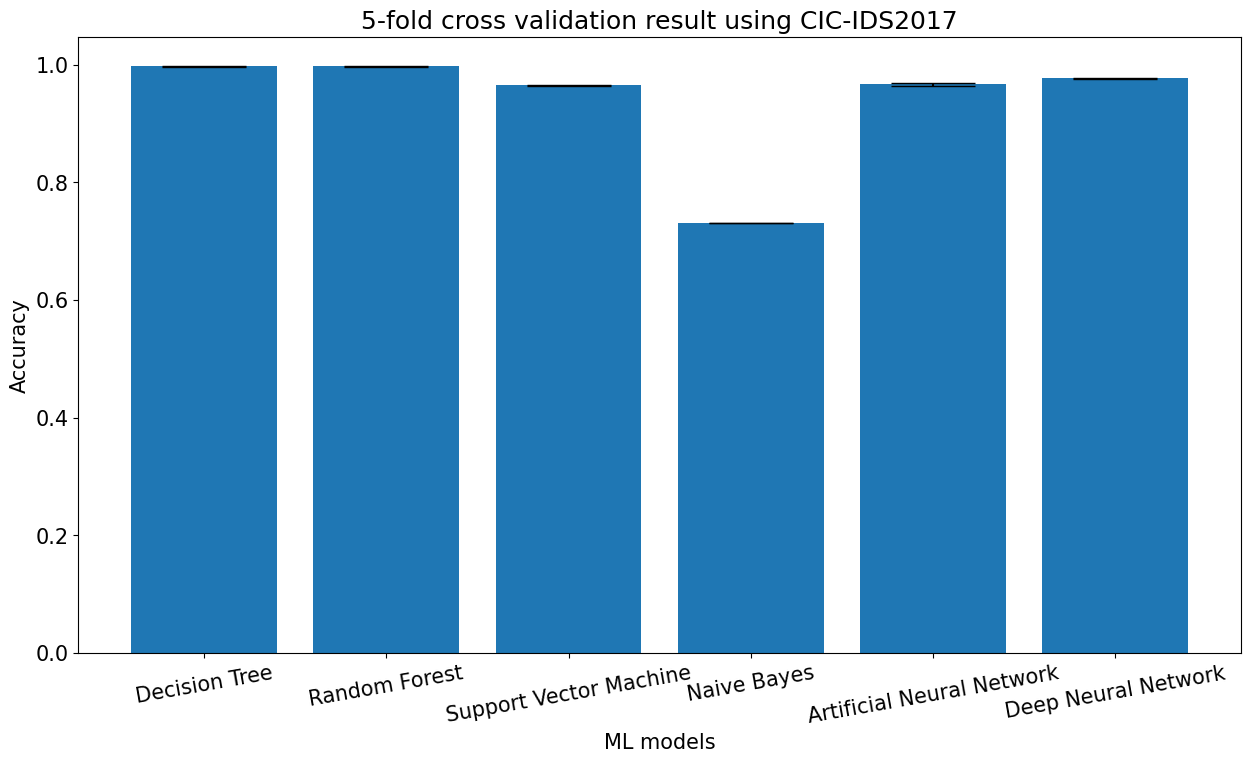

In [29]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize= (15, 8))

ax.bar(accuracy_scores_mean.keys(),
        accuracy_scores_mean.values(),
        yerr=accuracy_scores_std.values(),
        capsize=30)
ax.set_xlabel('ML models')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold cross validation result using CIC-IDS2017')
plt.setp(ax.get_xticklabels(), rotation=10, horizontalalignment='center') # rotate the label

plt.show()